# Case study on Supervised learning

 Do the following in the iris dataset.
* 1. Read the dataset to the python environment.
* 2. Do necessary pre-processing steps.
* 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

In [1]:
# Importing Pandas Library as 'pd'
import pandas as pd
# Importing NumPy Library as 'np'
import numpy as np
# Importing Matplot's Sub Library PyPlot as 'plt'
import matplotlib.pyplot as plt
# Importing seaborn Library as 'sns'
import seaborn as sns

#### 1.Read the dataset to the python environmen

In [2]:
# Getting data from Local Excel File and copying into iris_data Datafram
iris_data=pd.read_excel('iris (1).xls')

In [3]:
# Getting data of dataframe iris_data
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
 # Getting data of dataframe iris_data
iris_data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.shape

(150, 5)

In [6]:
#To knowing the sum of null value is pandas dataframe
iris_data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
print(iris_data.describe())

               SL          SW          PL          PW
count  143.000000  144.000000  144.000000  150.000000
mean     5.855944    3.049306    3.756250    1.198667
std      0.828168    0.430644    1.761306    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


##**Insights:**


*   The dataset contains the details of iris flower, like -          
      *   **SL** - The sepal lenght on centimeters_
      *   **SW** - The sepal width on centimeters _
      *   **PL** - The Petal lenght on centimeters _
      *   **PW** - The Petal Width on centimeters_
      *   **Classification** -The dataset have three types of iris:[ Iris Setosa,Iris Versicolour,Iris Virginica ]_
     
*   **150 Observations** and **5 Features** are found.
*   The **Null values** are recorded for:
      *   _The feature **SL** contains **7** null observations_
      *   _The feature **SW** contains **6** null observations_
      *   _The feature **PL** contains **6** null observations_
*  The **datatype** for the features - 
      *   _**Classification** - is given as Objects_
      *   _**SL,SW,PL,PW** - are given as Float with 64-bits_

###  Data Visualization

<AxesSubplot:>

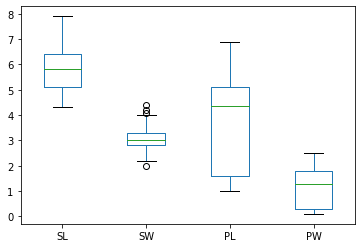

In [9]:
# box and whisker plots
iris_data.plot(kind='box', sharex=False, sharey=False)

>** Insights:-Just by observing the graph**
* The mean of SL is in between 5-6.
* The mean of SW is 3.
* The mean of PL is in between 4-5.
* The mean of PW is in between 1-2.

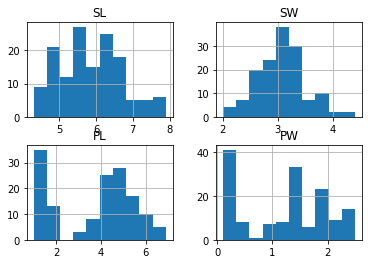

In [10]:
iris_data.hist()
plt.show()

array([[<AxesSubplot:title={'center':'PL'}, xlabel='[Classification]'>,
        <AxesSubplot:title={'center':'PW'}, xlabel='[Classification]'>],
       [<AxesSubplot:title={'center':'SL'}, xlabel='[Classification]'>,
        <AxesSubplot:title={'center':'SW'}, xlabel='[Classification]'>]],
      dtype=object)

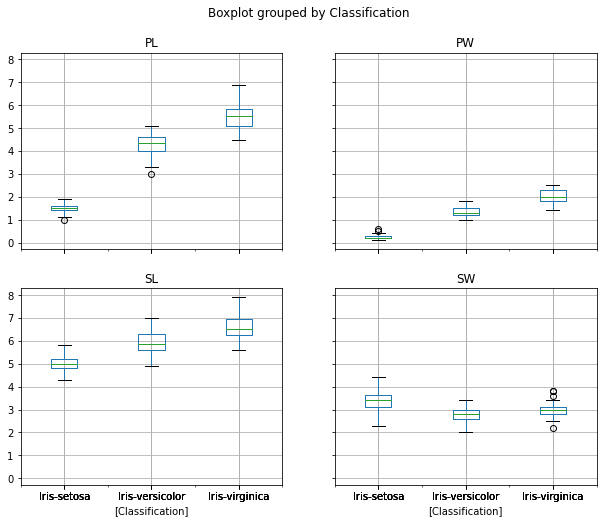

In [11]:
# boxplot on each feature split out by species
iris_data.boxplot(by="Classification",figsize=(10,8))

<AxesSubplot:xlabel='Classification', ylabel='PL'>

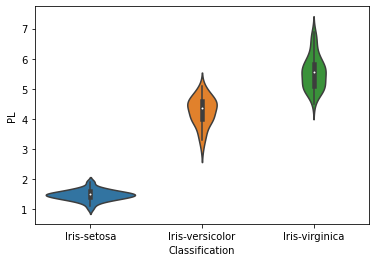

In [12]:
# violinplots on petal-length for each species
sns.violinplot(data=iris_data,x="Classification", y="PL")

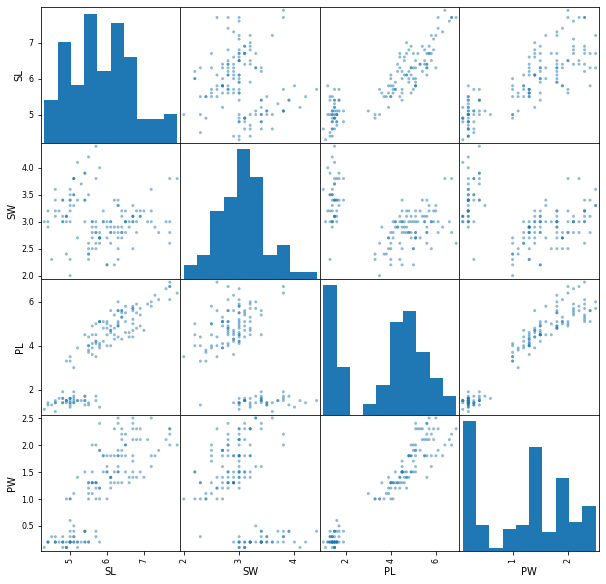

In [13]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(iris_data,figsize=(10,10))
plt.show()

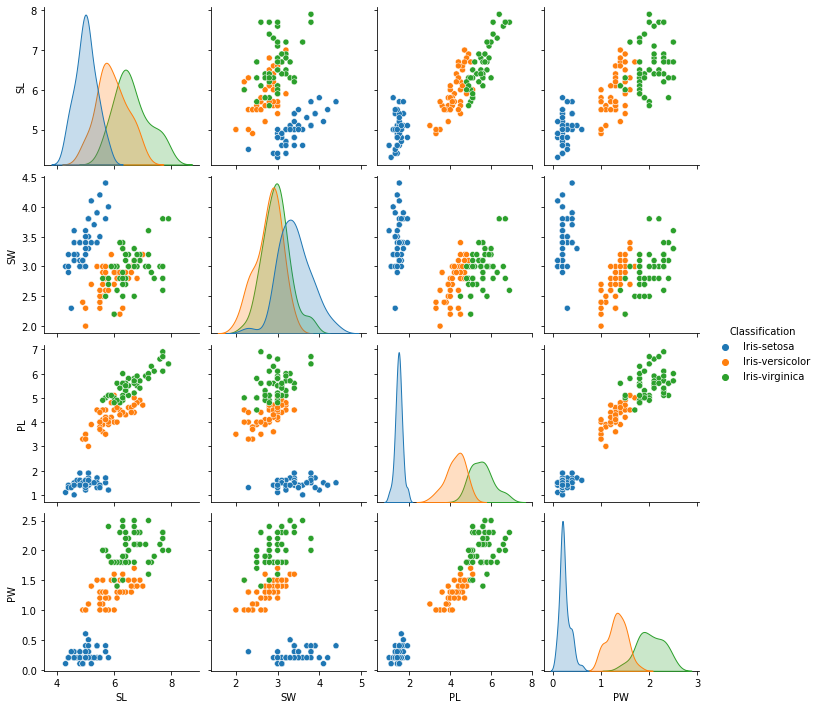

In [14]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(iris_data, hue="Classification")

### 2. Do necessary pre-processing steps.

#### Using loops to fill missing values

In [15]:
for i in [ 'SL','SW','PL']:
    iris_data[i] =iris_data[i].fillna(iris_data[i].median())

In [16]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [17]:
iris_data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
x=iris_data.drop(['Classification'],axis=1)
y=pd.DataFrame(iris_data['Classification'])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle=True)

In [20]:
from sklearn import preprocessing

In [21]:
standardisation = preprocessing.StandardScaler()
x= standardisation.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.566381e-16,-9.695948e-17,1.421085e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.927530e+00,-2.490174e+00,-1.612857e+00,-1.444450e+00
25%,-8.107207e-01,-5.880679e-01,-1.264758e+00,-1.181504e+00
50%,-6.618128e-02,-1.125413e-01,3.306937e-01,1.332259e-01
75%,6.783581e-01,5.413078e-01,7.658171e-01,7.905908e-01
max,2.539707e+00,3.216145e+00,1.810113e+00,1.710902e+00


### 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Random Forest

#### 1. Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
# f1 score
from sklearn.metrics import f1_score
print('f1 score is',f1_score(y_test, y_pred, average='macro'))

C:\Users\chinchu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy is 0.9777777777777777
f1 score is 0.9786453119786453


####  2. K-Nearest Neighbours

In [24]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
# f1 score
from sklearn.metrics import f1_score
print('f1 score is',f1_score(y_test, y_pred, average='macro'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy is 0.9777777777777777
f1 score is 0.9786453119786453


C:\Users\chinchu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### 3.Support Vector Machine's 

In [25]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
# f1 score
from sklearn.metrics import f1_score
print('f1 score is',f1_score(y_test, y_pred, average='micro'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy is 0.9777777777777777
f1 score is 0.9777777777777777


C:\Users\chinchu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 4. Decision Tree's

In [26]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
# f1 score
from sklearn.metrics import f1_score
print('f1 score is',f1_score(y_test, y_pred, average='micro'))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion matrix :
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy is 1.0
f1 score is 1.0


#### 5. Random Forest

In [27]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Confusion matrix is:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
# f1 score
from sklearn.metrics import f1_score
print('f1 score is',f1_score(y_test, y_pred, average='micro'))

<ipython-input-27-1446fa055c28>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion matrix is:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy is 1.0
f1 score is 1.0


> **Conclusion**
 * In logistic regression,K-Nearest neigbour and Support vector machine's Accuracy is 97 above.
 * In Decision's tree and Random forest accuracy is 1.0
*It is due the parameter random_state .now its cleared.